In [11]:
# imports
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [13]:
# Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, y_train = x_train/255.0, y_train/255.0
print('x_train shape: ', x_train.shape)

x_train shape:  (60000, 28, 28)


In [14]:
# reshape the data
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [20]:
# No of Classes
K = len(set(y_train))
print('No of Classes: ', K)

No of Classes:  10


In [25]:
# Build the model with functional API
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = Conv2D(64,(3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = Conv2D(128,(3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [27]:
# Compile and Fit
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 82s 43ms/step - loss: 0.0034 - accuracy: 0.1000 - val_loss: 56992.0273 - val_accuracy: 0.1000
Epoch 2/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 56992.0273 - val_accuracy: 0.1000
Epoch 3/15
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 56992.0273 - val_accuracy: 0.1000
Epoch 4/15
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 56992.0273 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 56992.0273 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0000e+00 - accuracy: 0.1000 - val_loss: 56992.0273 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 118s 63ms/step - loss: 

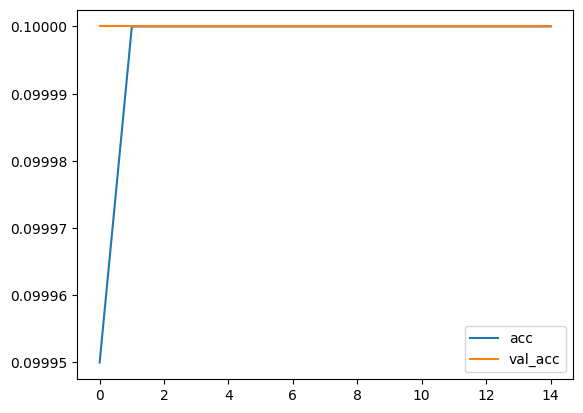

In [28]:
# plot accuracy and loss
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

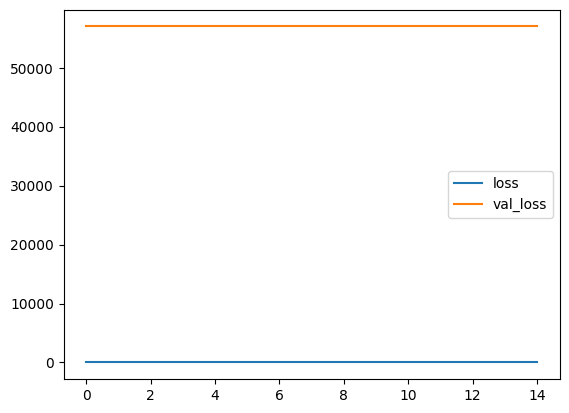

In [29]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [30]:
# Label Mapping
labels = '''T-Shirt/Top
Trousers
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

In [34]:
p_test = model.predict(x_test).argmax(axis = 1)

313/313 [==============================] - 4s 12ms/step


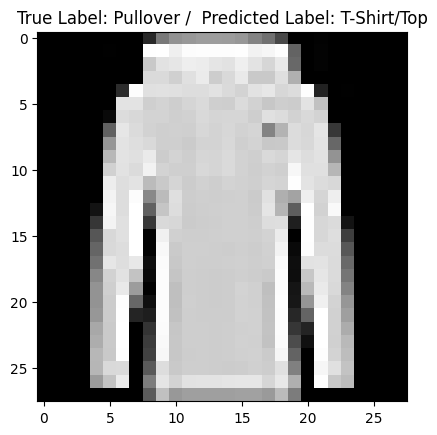

In [39]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title('True Label: %s /  Predicted Label: %s' % (labels[y_test[i]], labels[p_test[i]]));